### Import Libraries

In [2]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint #Continuous values for randomized
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hypertuning
from sklearn.model_selection import cross_val_score #For cross-validation
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

### Import Dataset

In [3]:
data = pd.read_csv('advertising.csv')
data

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
df = data.drop(["ID"],axis=1) 
X = data.drop('Sales', axis=1)
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #sets mean to 0 and standard deviation to 1
X_test = scaler.transform(X_test) #to not apply to test

### Apply Model Selection

In [5]:
models = {
    'LinearRegression': LinearRegression(),
    'XGBRegressor': XGBRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SupportVectorMachine': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KernelRidge': KernelRidge(),
}

In [6]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Measure run_time, rmse, and rmse_cv
    run_time = 0
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_cv = np.mean(np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)))
    
    results.append({'Model': name, 'Run Time': run_time, 'RMSE': rmse, 'RMSE_CV': rmse_cv})

### Evaluate the Model

In [7]:
# Display model evaluation results
results_df = pd.DataFrame(results)
print(results_df)

# Choose the best model
best_model_name = results_df.sort_values(by=['Run Time', 'RMSE', 'RMSE_CV']).iloc[0]['Model']
best_model = models[best_model_name]

                   Model  Run Time      RMSE   RMSE_CV
0       LinearRegression         0  1.788576  1.737981
1           XGBRegressor         0  0.932264  0.910223
2           RandomForest         0  0.809044  0.837699
3   SupportVectorMachine         0  2.266409  2.542278
4  DecisionTreeRegressor         0  1.305278  1.160814
5            KernelRidge         0  2.067882  2.010522


### Hyperparameter Tuning

In [8]:
param_grid = {
    'LinearRegression': {},
    'XGBRegressor': {},
    'RandomForest': {'n_estimators': [10, 50, 100, 200]},
    'SupportVectorMachine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto']},
    'DecisionTreeRegressor': {'criterion': ['mse', 'mae'], 'splitter': ['best', 'random']},
    'KernelRidge': {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

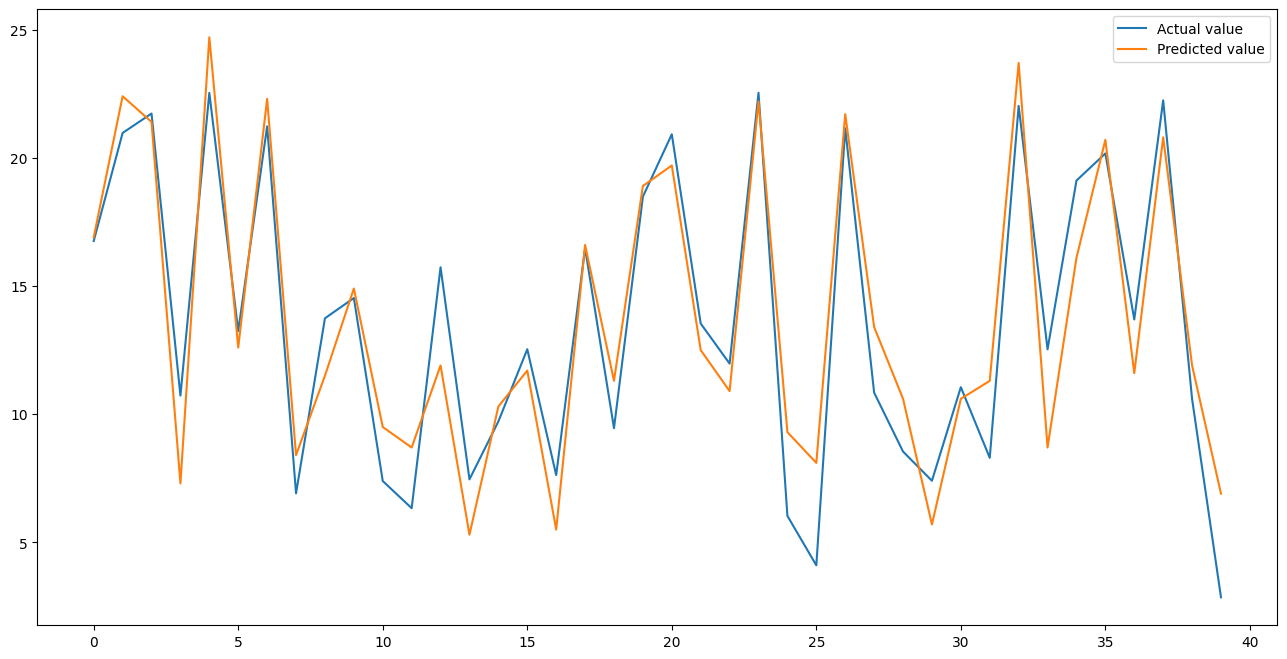

In [10]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])